In [1]:
import numpy as np
import umap
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json
import torch
from tqdm import tqdm
from sklearn.manifold import TSNE

def load_object(filename):
    with open(filename, 'rb') as f:
        return pickle.load(f)
    

data_dir = '/data/grbv/PDBbind/DTI5_input_data_processed'

/data/grbv/.conda/envs/plot_cluster/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# # Categories of Datapoints

# embedding_descriptor = 'ankh_base'

# casf2016_dir = '/data/grbv/PDBbind/raw_data/CASF-2016/coreset'
# casf2013_dir = '/data/grbv/PDBbind/raw_data/CASF-2013/coreset'

# casf2013_dir = '/data/grbv/PDBbind/raw_data/CASF-2013/coreset'
# casf2013_c4_dir = f'/data/grbv/PDBbind/DTI_5/input_graphs_{embedding_descriptor}/test_data/casf2013_c4'
# casf2016_dir = '/data/grbv/PDBbind/raw_data/CASF-2016/coreset'
# casf2016_c4_dir = f'/data/grbv/PDBbind/DTI_5/input_graphs_{embedding_descriptor}/test_data/casf2016_c4'

# train_data_dir = f'/data/grbv/PDBbind/DTI_5/input_graphs_{embedding_descriptor}/training_data'

# training_datapoints = [file[0:4] for file in os.listdir(train_data_dir) if file[0].isdigit()]

# casf2016_complexes = [folder for folder in os.listdir(casf2016_dir)]
# casf2013_complexes = [folder for folder in os.listdir(casf2013_dir)]

# casf2016_datapoints = [folder for folder in os.listdir(casf2016_dir)]
# casf2016_datapoints_filtered = [file[0:4] for file in os.listdir(casf2016_c4_dir)]
# casf2013_datapoints = [folder for folder in os.listdir(casf2013_dir)]
# casf2013_datapoints_filtered = [file[0:4] for file in os.listdir(casf2013_c4_dir)]

# test_datapoints = casf2016_datapoints + casf2013_datapoints

In [ ]:
# # Generate a list of all complexes

# data_dir = '/data/grbv/PDBbind/DTI5_input_data_processed'
# complexes = [folder for folder in os.listdir(data_dir) if folder[0].isdigit() and len(folder) == 4]

# affinity_dict_path = '/data/grbv/PDBbind/DTI5_general_affinity_dict.pkl'
# affinity_dict = load_object(affinity_dict_path)

In [ ]:
# data_dict_json = {}

# for complex in tqdm(complexes):
#     data_dict_json[complex] = {}

#     data_dict_json[complex]['affinity'] = affinity_dict[complex]['log_kd_ki']
#     data_dict_json[complex]['training_datapoint'] = complex in training_datapoints
#     data_dict_json[complex]['test_datapoint'] = complex in test_datapoints
#     data_dict_json[complex]['casf2016_datapoint'] = complex in casf2016_datapoints
#     data_dict_json[complex]['casf2016_datapoint_filtered'] = complex in casf2016_datapoints_filtered
#     data_dict_json[complex]['casf2013_datapoint'] = complex in casf2013_datapoints
#     data_dict_json[complex]['casf2013_datapoint_filtered'] = complex in casf2013_datapoints_filtered

# # Convert the counter to a dictionary and write it to a JSON file
# with open('PDBbind_data.json', 'w', encoding='utf-8') as json_file:
#     json.dump(data_dict_json, json_file, ensure_ascii=False, indent=4)

# print("Results have been written to results.json")

In [4]:
data_dir = '/data/grbv/PDBbind/DTI5_input_data_processed'

# Read the JSON file and convert it into a dictionary
with open('/home/grabeda2/DTI/clustering/PDBbind_data.json', 'r', encoding='utf-8') as json_file:
    complexes = json.load(json_file)

In [5]:
# Load Ankh protein embeddings

# protein_embeddings = np.array([], dtype=np.int64).reshape(0, 768)

# for complex in tqdm(complexes):
#     emb_path = os.path.join(data_dir, complex, f'{complex}_ankh_base.pt')
#     emb = torch.load(emb_path, map_location='cpu')
#     protein_emb = np.mean(emb, axis=0)
#     protein_embeddings = np.vstack((protein_embeddings, protein_emb))

# print(protein_embeddings.shape)

100%|██████████| 19143/19143 [16:40<00:00, 19.13it/s]

(19143, 768)


In [8]:
# with open('clustering/ankh_embeddings.npy', 'wb') as f:
#     np.save(f, protein_embeddings)

In [12]:
# Load ChemBERTa ligand embeddings

# ligand_embeddings = np.array([], dtype=np.int64).reshape(0, 384)

# for complex in tqdm(complexes):
#     emb_path = os.path.join(data_dir, complex, f'{complex}_ChemBERTa-77M-MLM.pt')
#     emb = torch.load(emb_path, map_location='cpu').numpy()
#     ligand_emb = np.mean(emb, axis=0)
#     ligand_embeddings = np.vstack((ligand_embeddings, ligand_emb))

# print(ligand_embeddings.shape)

  0%|          | 0/19143 [00:00<?, ?it/s]

100%|██████████| 19143/19143 [04:24<00:00, 72.45it/s] 

(19143, 384)


In [14]:
# with open('clustering/ChemBERTa_embeddings.npy', 'wb') as f:
#     np.save(f, ligand_embeddings)

# PLOT EMBEDDINGS

In [49]:
def plot_clustering(embedding, c, title):

    colormap = {0:'grey', 1:'green', 2:'red'}
    sizemap = {0:1, 1:3, 2:3}

    # Plotting the results
    plt.figure(figsize=(8,8), dpi=400)
    plt.style.use('ggplot')
    plt.scatter(embedding[:, 0], embedding[:, 1], s=[sizemap[i] for i in c], c=[colormap[i] for i in c], alpha=0.4)
    plt.xlabel('component 1')
    plt.ylabel('component 2')
    plt.title(title)
    plt.show()


In [45]:
## Coloring of Points

c = []

for complex in complexes:

    if complexes[complex]['training_datapoint']: c.append(0)
    elif complexes[complex]['casf2016_datapoint_filtered']: c.append(1)
    elif complexes[complex]['casf2013_datapoint_filtered']: c.append(1)
    else: c.append(2)

## Protein Embeddings

In [37]:
embedding = np.load('clustering/ankh_embeddings.npy')
embedding.shape

(19143, 768)

### T-SNE

In [38]:
# Configure t-SNE parameters
tsne = TSNE(n_components=2, verbose=0, perplexity=30, n_iter=300)

# Apply t-SNE to your data
tsne_embedding = tsne.fit_transform(embedding)

In [39]:
tsne_embedding.shape

(19143, 2)

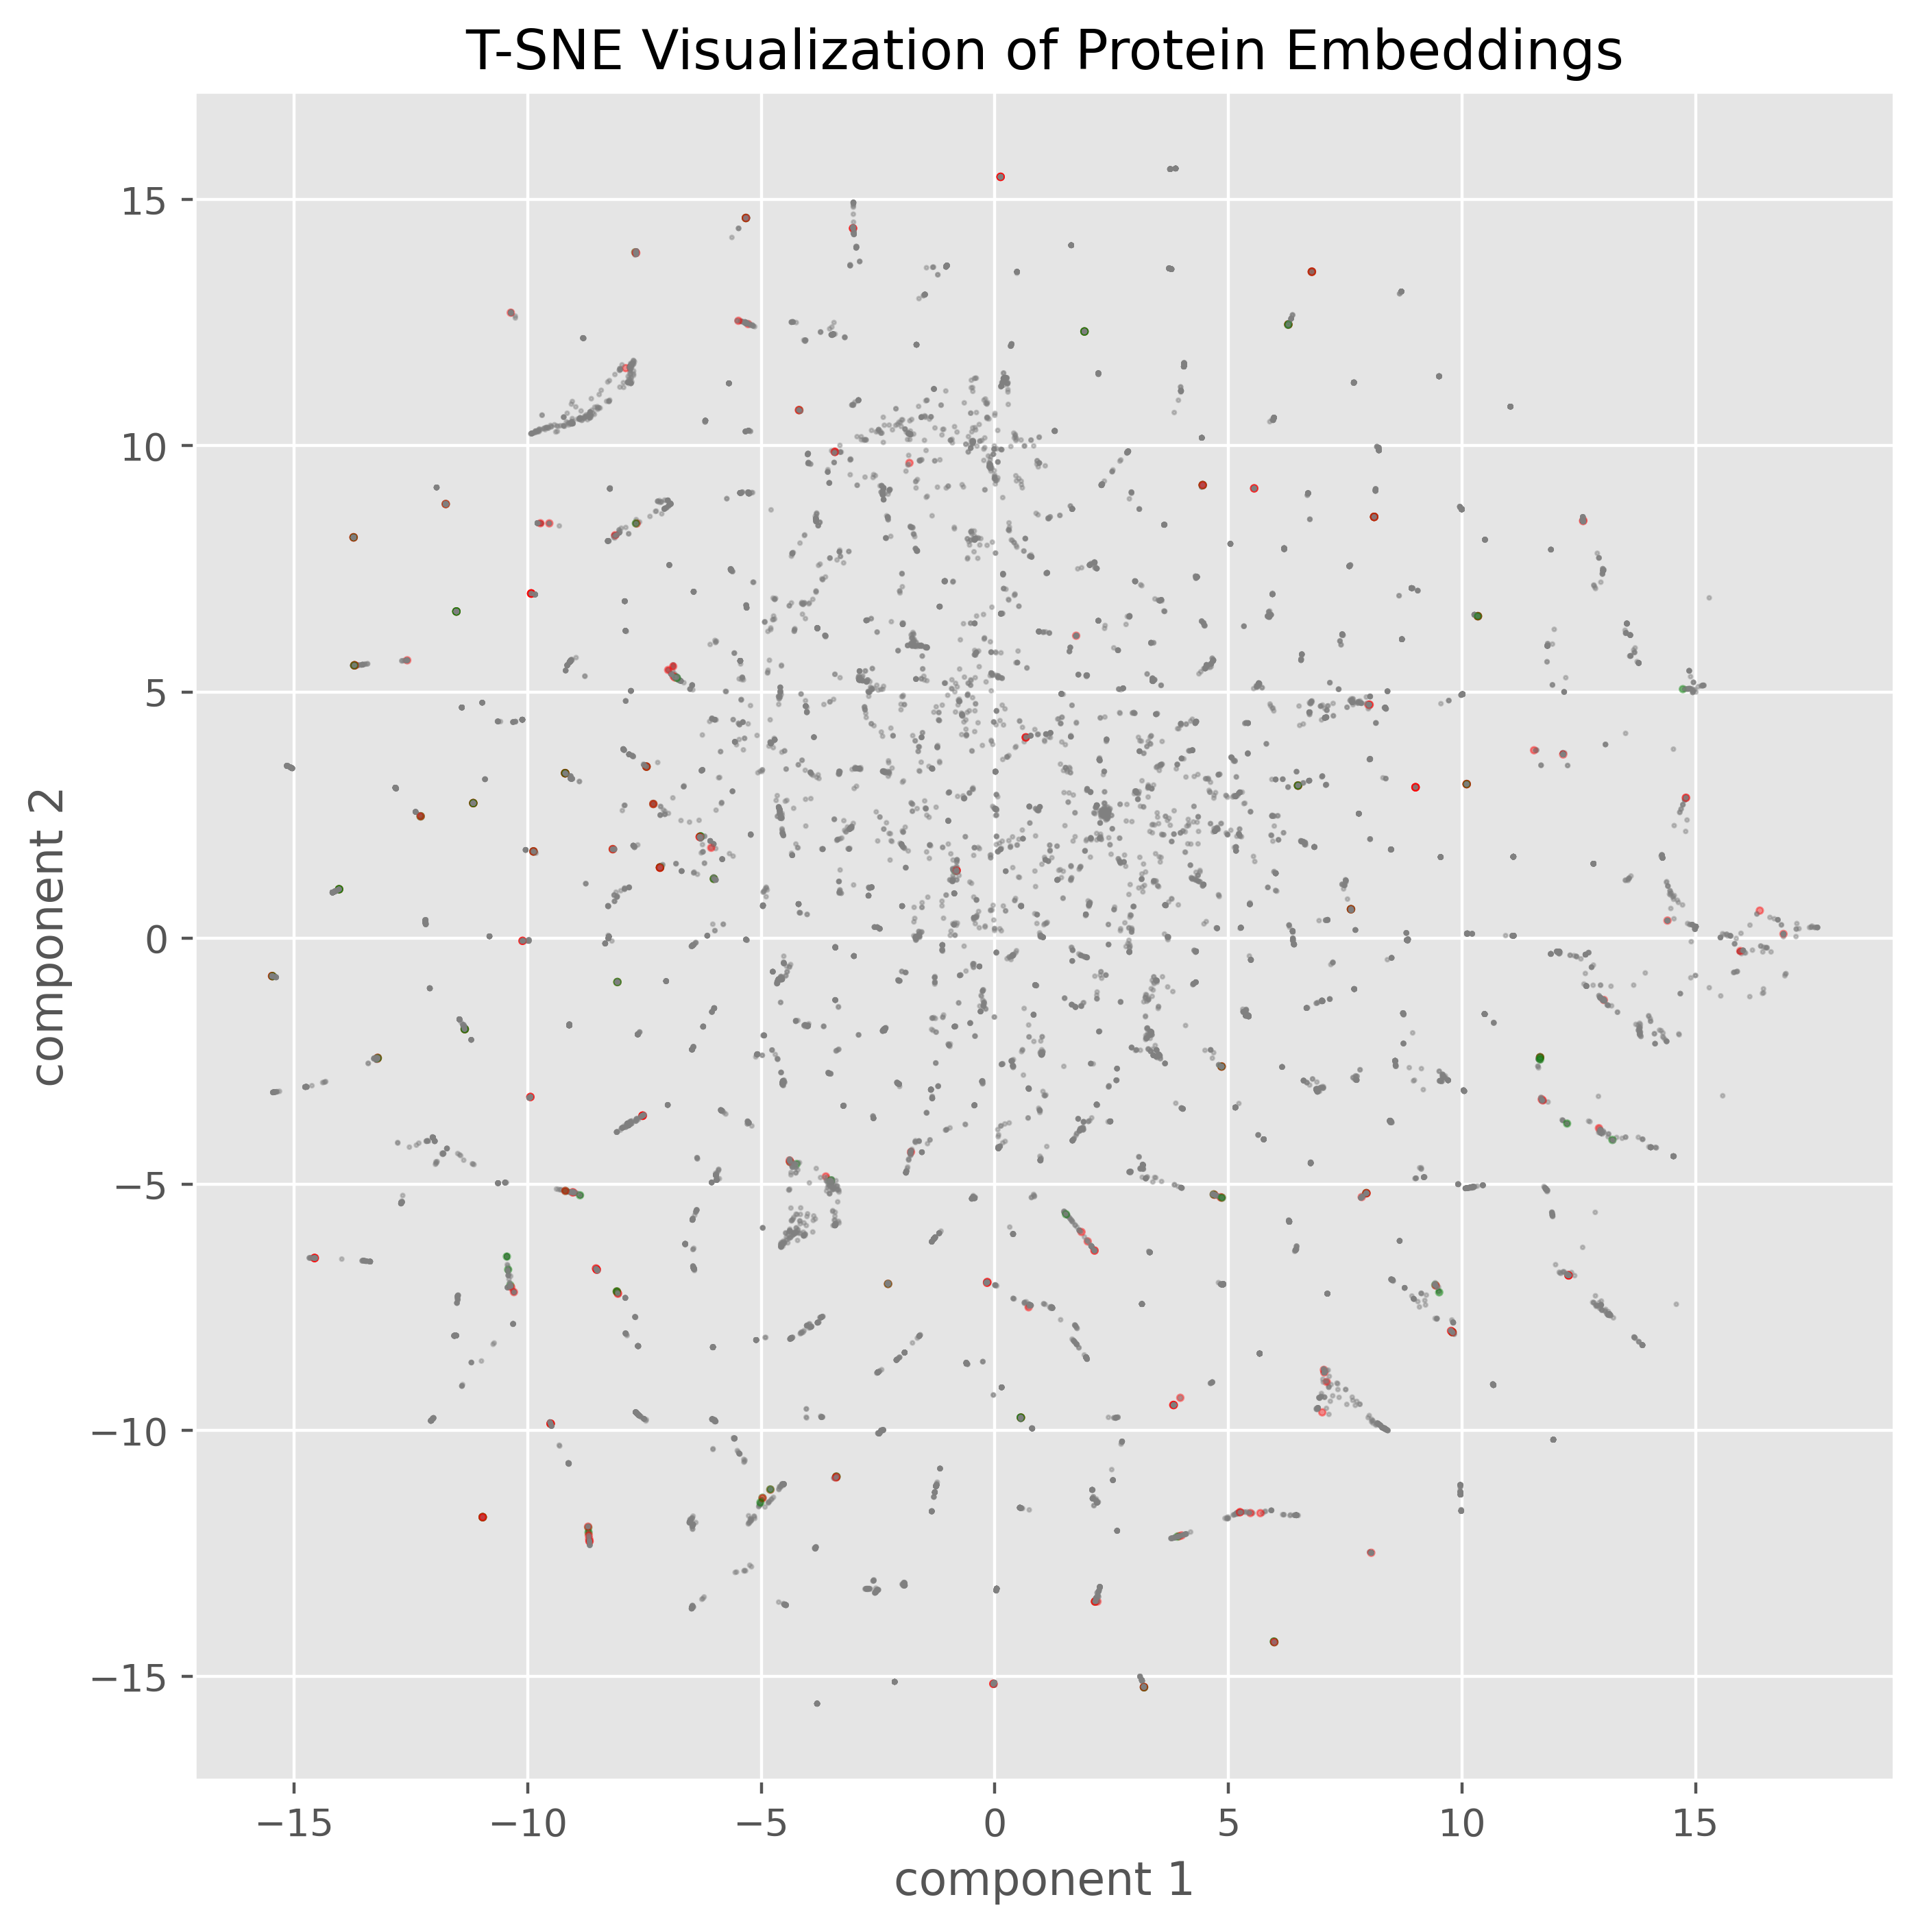

In [50]:
plot_clustering(tsne_embedding, c, 'T-SNE Visualization of Protein Embeddings')

### UMAP

In [43]:
# Reduce fingerprints to 2D with UMAP

reducer = umap.UMAP(min_dist=0.75, n_neighbors=15)
umap_embedding = reducer.fit_transform(embedding)

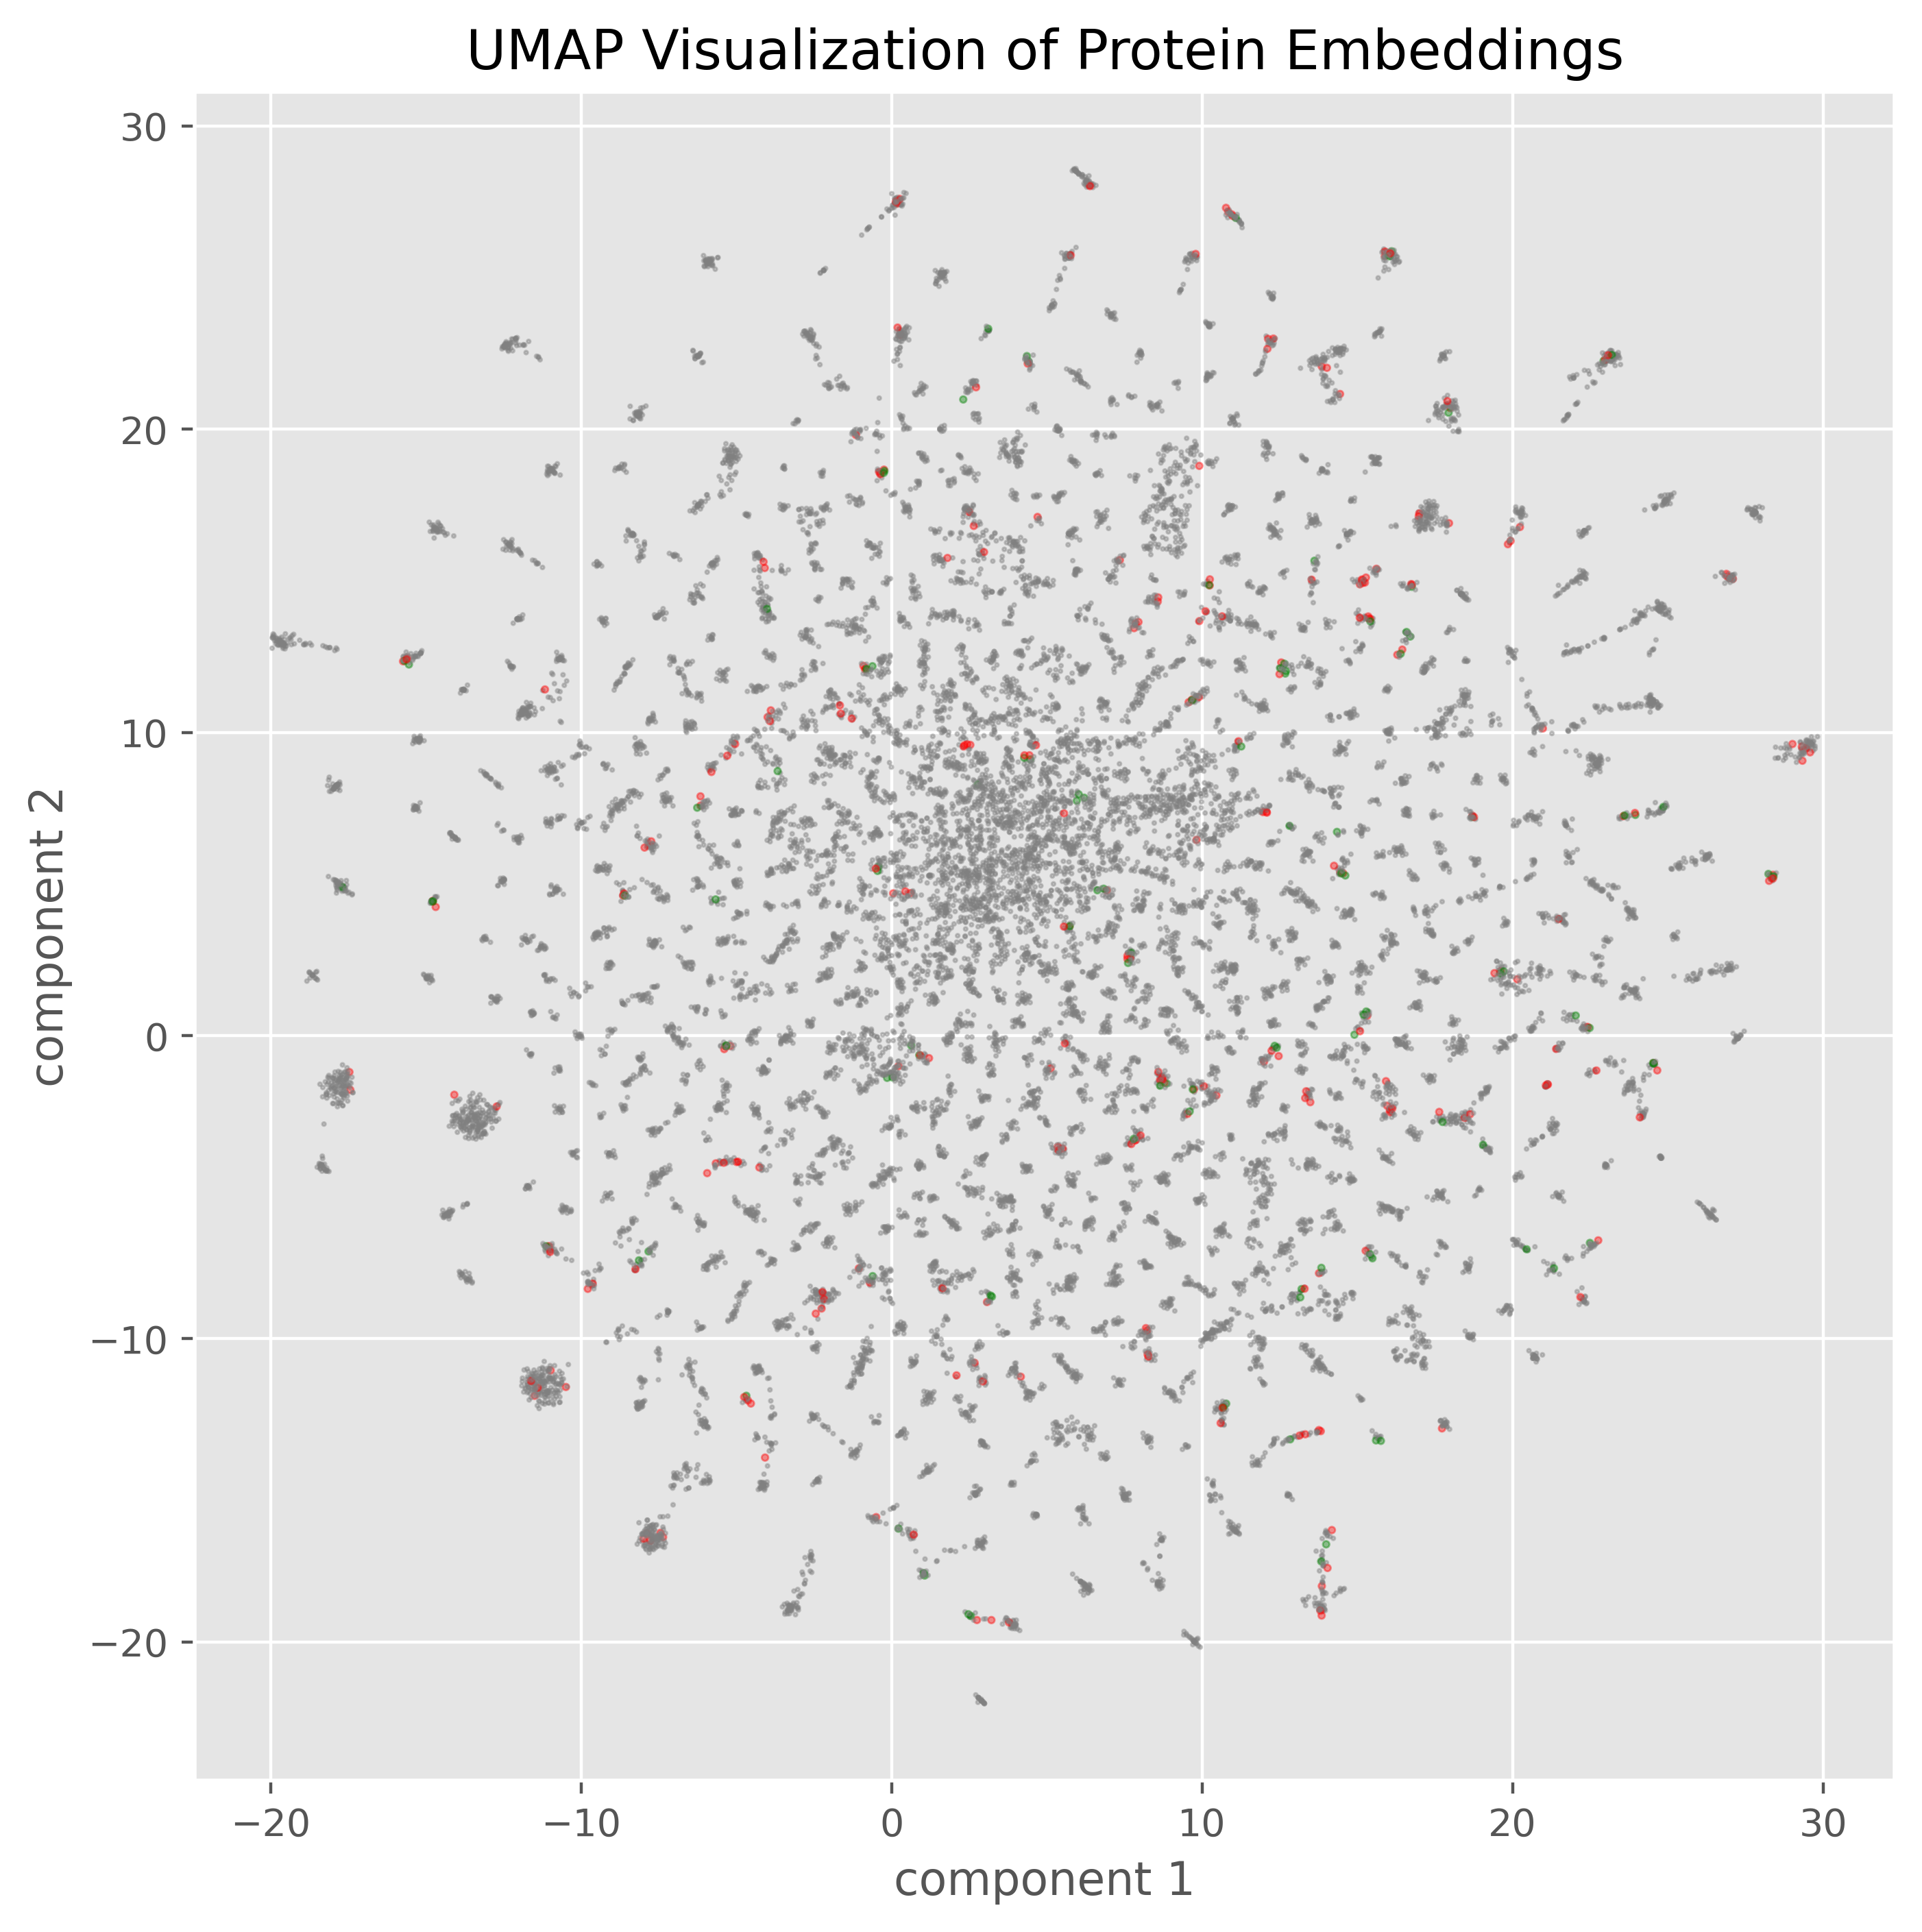

In [51]:
plot_clustering(umap_embedding, c, 'UMAP Visualization of Protein Embeddings')

## Ligand Embeddings

In [52]:
embedding = np.load('clustering/ChemBERTa_embeddings.npy')
embedding.shape

(19143, 384)

### T-SNE

In [53]:
# Configure t-SNE parameters
tsne = TSNE(n_components=2, verbose=0, perplexity=30, n_iter=300)

# Apply t-SNE to your data
tsne_embedding = tsne.fit_transform(embedding)

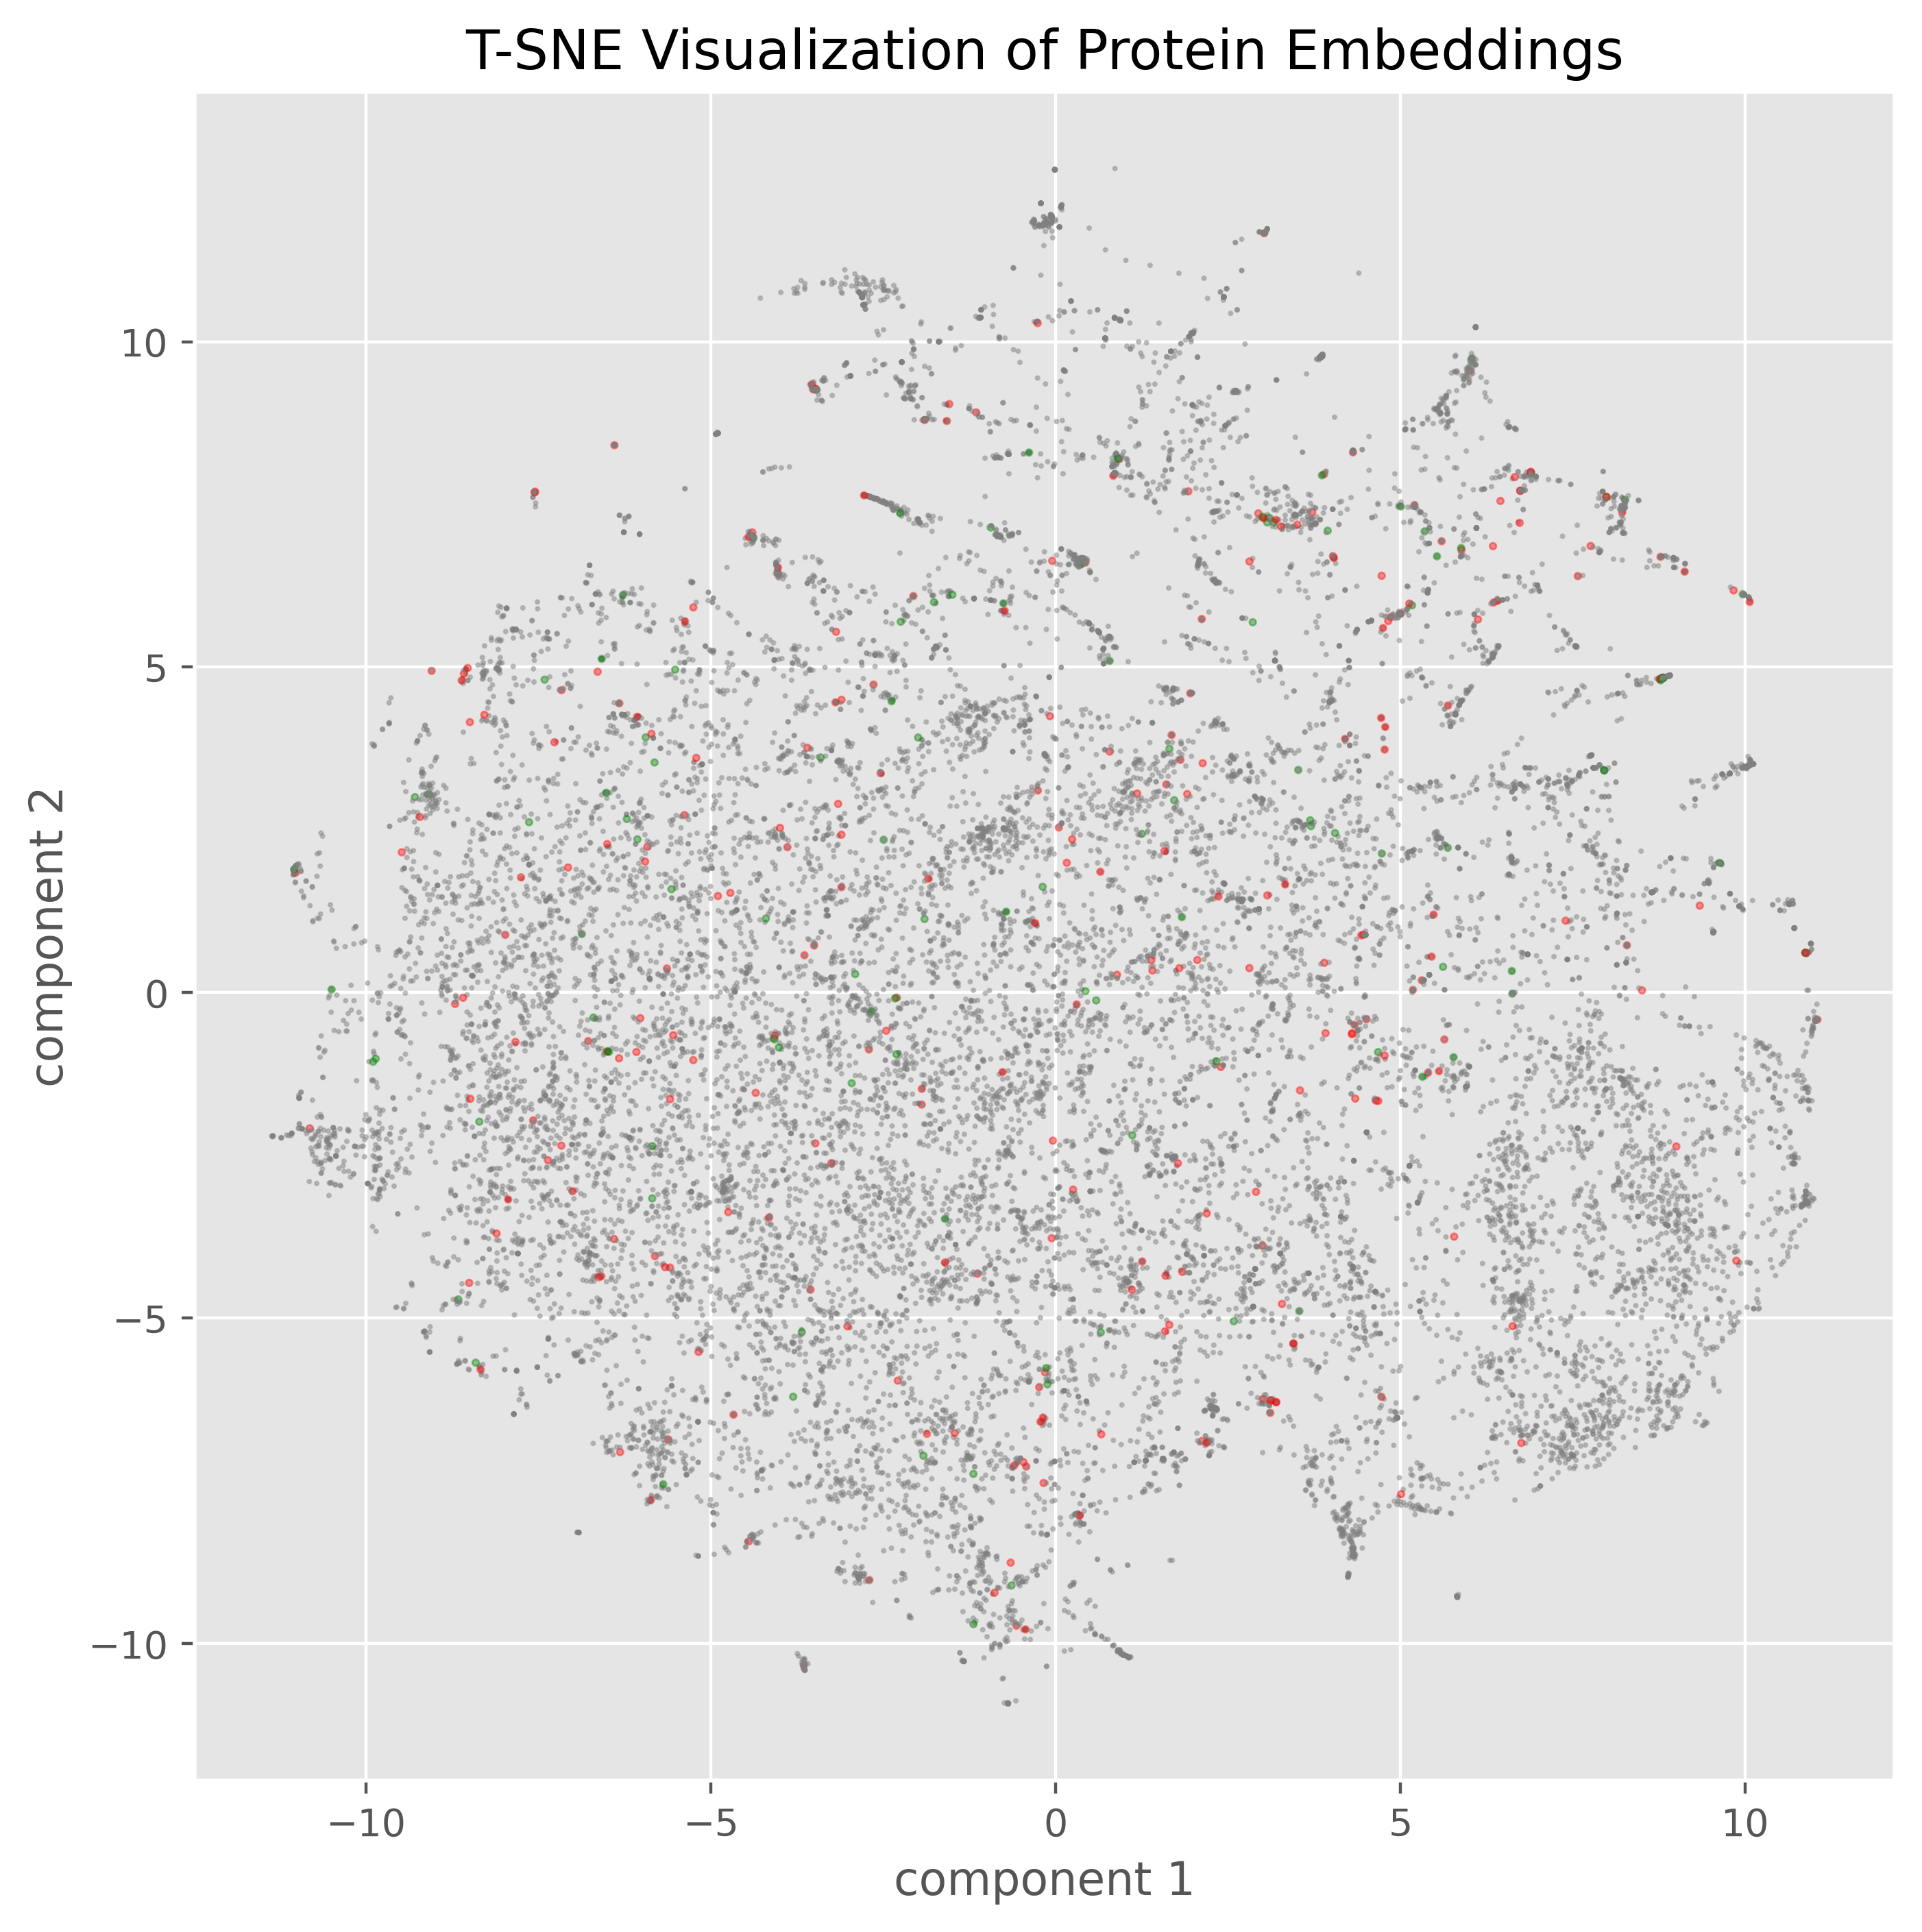

In [54]:
plot_clustering(tsne_embedding, c, 'T-SNE Visualization of Protein Embeddings')

### UMAP

In [55]:
# Reduce fingerprints to 2D with UMAP

reducer = umap.UMAP(min_dist=0.75, n_neighbors=15)
umap_embedding = reducer.fit_transform(embedding)

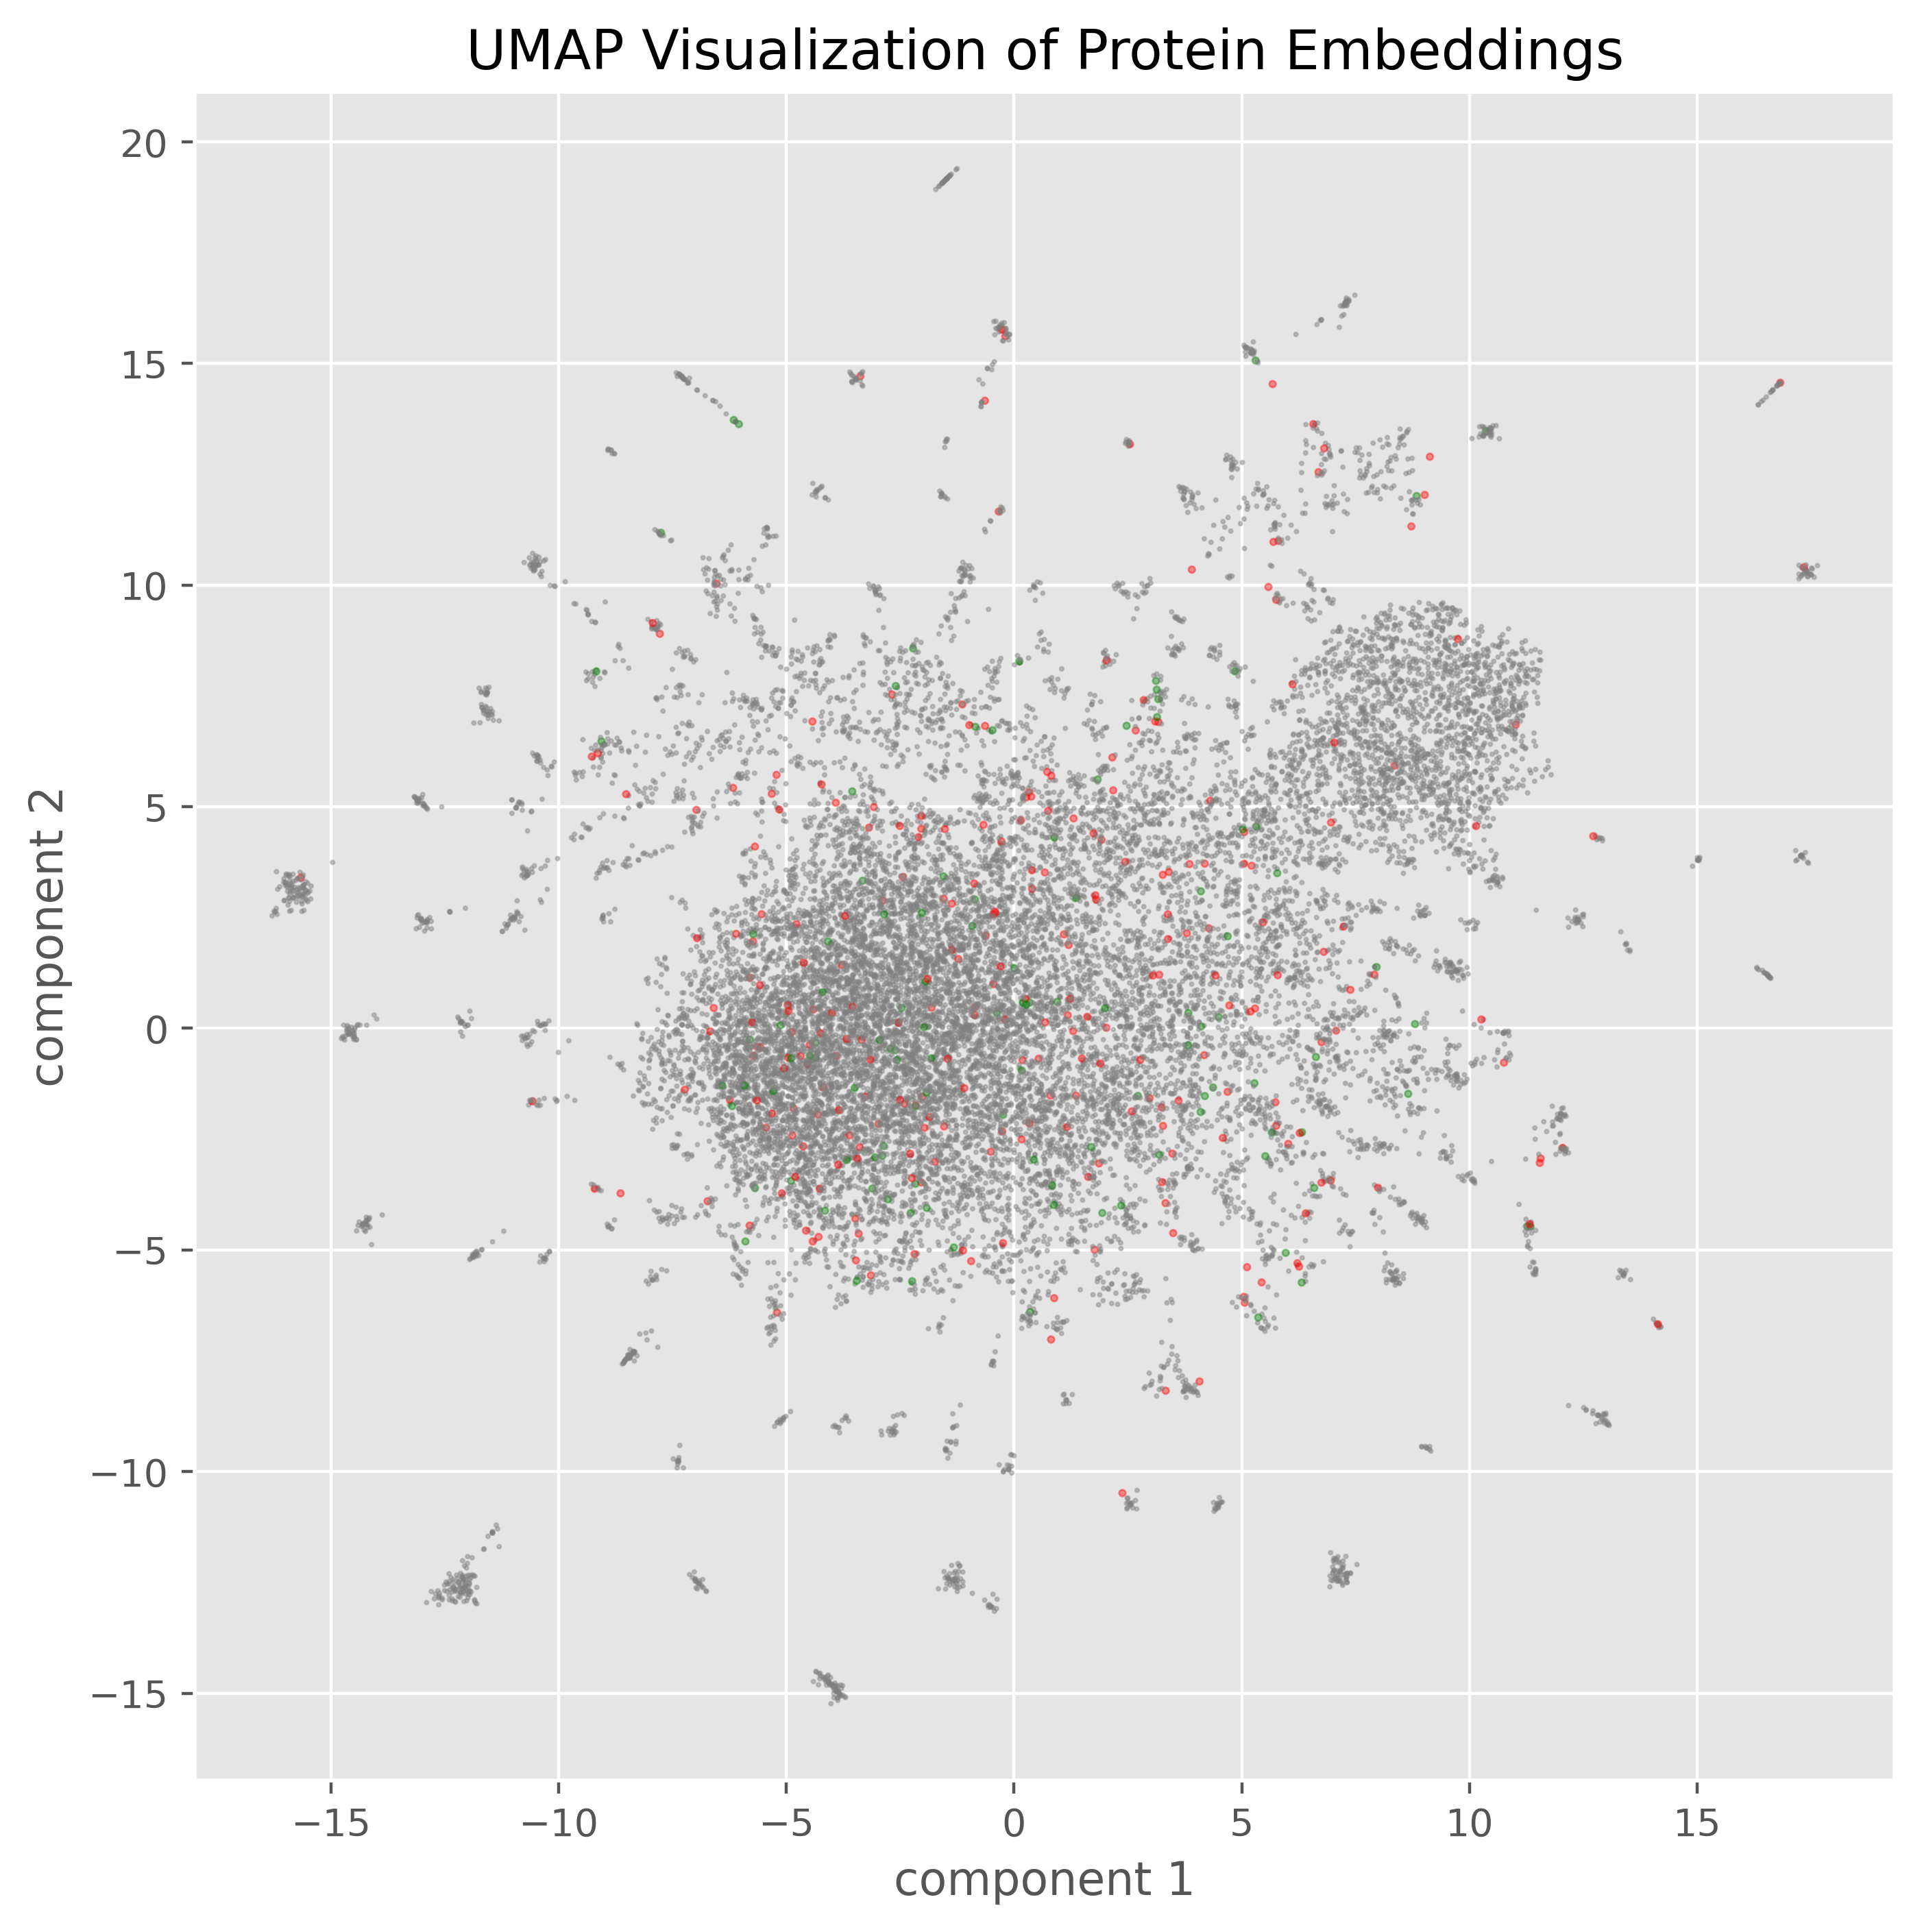

In [56]:
plot_clustering(umap_embedding, c, 'UMAP Visualization of Protein Embeddings')

## Combined Embeddings